In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
import json

importo las librerias necesarias para el desarrollo del analisis

In [3]:
ruta=os.path.os.getcwd()
with open(os.path.join(ruta,'..','Archivos','partidas.csv'), 'r', encoding='utf-8') as ap:
    df=pd.read_csv(ap,delimiter=',')

Leo el archivo csv ,con pandas utilizando el metodo .read_csv, que esta en la carpeta Archivos/partidas.csv, y los transformo a un DataFrame

 ## Top 10 de palabras que se encuentran primero de todas las partidas.
Creo un  DataFrame completo pero solo con la columna de evento de  las repuestas acertadas,es decir las que son BIEN!. Ahora creo un array del texto ingresado que mas veces se acerto, utilizando el value.counts() que es un metodo de la serie/columna de texto ingresado. Para luego tomar los primeros 10 que mas se repiten utilizando el metodo .head().

In [18]:
    df_top=df[df['estado']=='BIEN!']
    contador_df=df_top['texto ingresado'].value_counts()
    top10_palabras=contador_df.head(10)
    print(top10_palabras)

Honshu-Japan (Japan)    2
Maximilian Rossmann     1
Youssouf M'Changama     1
Flemming Niemann        1
Youssouph Badji         1
Paulo Vítor             1
Mark Cullen             1
Jailson Caeiro          1
Iván Morales            1
Jonas Blue              1
Name: texto ingresado, dtype: int64


## Gráfico que muestre el porcentaje de partidas por estado (fin, cancelada, error,
## timeout). También debe tener en cuenta las partidas que se terminaron
## inesperadamente o de forma repentina (partidas sin evento de fin). 

Creo 4 DataFrame uno por cada evento, el evento error nunca va a aparecer porque no tiene evento.
Luego a cada Dataframe le tomo la longuitud de elementos que tiene,es decir, la cantidad de partidas por estado.
Luego creo una lista con los 4 estados y una lista de colores a eleccion.
para crear un grafico en forma de pie, donde recibe como parametro la lista de la cantidad de partidas por estado de cada estado, un label con la lista de los 4 estados, los colores y el autopct es para que calcule el porcentaje por estado.

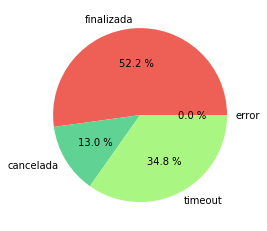

In [19]:
    df_estf=df[df['evento']=='Fin']
    df_estc=df[df['evento']=='cancelada']
    df_este=df[df['evento']=='error']
    df_estt=df[df['estado']=='TimeOut']
    fcount=len(df_estf)
    ccount=len(df_estc)
    ecount=len(df_este)
    tcount=len(df_estt)
    fin=['finalizada','cancelada','timeout','error']
    colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
    plt.pie([fcount,ccount,tcount,ecount],labels=fin, autopct="%0.1f %%",colors=colores)
    plt.show()

## Gráfico que muestre el porcentaje de partidas finalizadas según género.
Creo un DataFrame con todos los eventos de Fin que hubo en mi csv y con ese DataFrame creo otro con los usuarios que tengo del DataFrame creado anteriormente.
Abro el json de perfiles para poder ver los generos de cada jugador, y leo los perfiles con json.load.
Seteo o,m,h que son contadores y por cada elemento de la lista de los perfiles que lei y ademas por cada nombre de mi DataFrame de los usuarios que finalizaron pregunto si el nombre de mi usuario es igual al elemento de mi json, es decir el nick.
Si es asi veo de que genero es y aumento el contador correspondiente.
Luego creo una lista de los 3 generos posibles.
Creo un grafico de pie donde le paso por parametro una lista de los contadores h,m,o, se le pasa un labels que seria la lista de los generos y el autopct para que calcule el porcentaje.

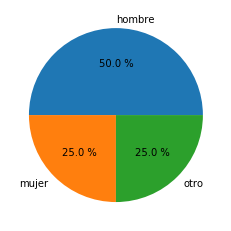

In [20]:
df_est=df[df['evento']=='Fin']
df_user=df_est['usuarie']
with open(os.path.join(ruta,'..','Archivos','perfiles.json'),'r') as pp:
    lista_dic=json.load(pp)
    o=0
    m=0
    h=0
    for elem in lista_dic:
        for name in df_user:
            if (name==elem['nick']):
                if elem['genero']=='Mujer':
                    m+=1
                elif  elem['genero']=='Hombre':
                    h+=1
                else:
                    o+=1
generos=['hombre','mujer','otro']
plt.pie([h,m,o],labels=generos,autopct="%0.1f %%")
plt.show()

## Gráfico que muestre el porcentaje de partidas finalizadas según nivel. 
Creo un DataFrame solo con los eventos de Fin y apartir de ese DataFrame creo otros cinco segun el nivel.
A estos 5 les tomo la longuitud del DataFrame ya que serian las partidas finalizadas por cada nivel.
Luego creo una lista con las 5 dificultades que se puede tener en el juego, creo otra lista con colores a eleccion.
Creo un grafico pie para mostrar el porcentaje de partidas finalizadas segun nivel que se le pasa como paranetro, una lista de la cantidad de partidas finalizadas por nivel, un label que seria la lista creada anteriormente de dificultad, le paso como parametro los colores elejidos y el autopct para que calcule el porcentaje.

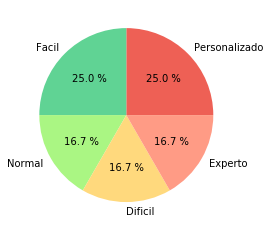

In [21]:
df_est=df[df['evento']=='Fin']
df_p=df_est[df_est['nivel']=='Personalizado']
df_f=df_est[ df_est['nivel']=='Facil']
df_n=df_est[ df_est['nivel']=='Normal']
df_d=df_est[df_est['nivel']=='Dificil']
df_e=df_est[ df_est['nivel']=='Experto']
dfp=len(df_p)
dff=len(df_f)
dfn=len(df_n)
dfd=len(df_d)
dfe=len(df_e)
dificultad=['Personalizado','Facil','Normal','Dificil','Experto']
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
plt.pie([dfp,dff,dfn,dfd,dfe],labels=dificultad,autopct="%0.1f %%",colors=colores)
plt.show()

## Duración total de la partida (desde que el usuarie empieza a jugar hasta que
## presiona salir o pasan las N rondas definidas para el nivel de dificultad actual).
Creo una lista vacia e itero por cada elemento de la columna 'evento' de mi DataFrame, utilizo el enumerate para tener un indice por cada elemento leido. si el elemento leido es inicio_partida  me guardo el tiempo de ese elemento y si el sigueinte elemento leido es Fin o cancelada, es decir termino la partida o abandono, vuelvo a tomar el tiempo de ese elemento (con el metodo iloc en ambos) y a mi lista vacia le  agrego la resta del tiempo fin con el tiempoinicio.
Luego creo un DataFrame de esa lista con la columna de duracion de cada partida jugada

In [22]:
    lista=[]
    for i,elem in enumerate(df['evento']):
        if elem=='inicio_partida':          
            time_in=df.iloc[i]['timestamp']
        elif (elem=='Fin' or elem=='cancelada'):
            time_fin=df.iloc[i]['timestamp']
            lista.append(int(time_fin)-int(time_in))
    df_dpart=pd.DataFrame(lista,columns=['duracion_partida'])
    print(df_dpart)

    duracion_partida
0                 26
1                 24
2                 19
3                 22
4                 26
5                 49
6                 15
7                 12
8                  6
9                 26
10                12
11                13
12                55
13                78
14                 3


## Tiempo de la respuesta exitosa más rápida.
Creo una lista vacia e itero por cada elemento de la columna 'estado' de mi DataFrame , utilizo el enumerate para tener un indice por cada elemento leido. si el elemento leido es 'nueva'  me guardo el tiempo de ese elemento y pongo mi booleano(ok) en en verdadero y si el sigueinte elemento leido es BIEN!, es decir acerto la tarjeta vuelvo a tomar el tiempo de ese elemento (con el metodo iloc en ambos) y a mi lista vacia le agrego la resta de el tiempo fin con el tiempoinicio y seteo a mi booleano en falso ya que puede haber mas elemento en los cuales acerto el usuario.
Luego creo un DataFrame de esa lista con la columna de tiempo exitoso de cada acierto exitoso.
Luego con el metodo min del DataFrame creado, toma el tiempo exitoso mas rapido.

In [23]:
l=[]
for i,elem in enumerate(df['estado']):
    if elem=='nueva':
        ok=True
        time_inicio=df.iloc[i]['timestamp']
    elif (elem=='BIEN!' and ok):
            ok=False
            time_final=df.iloc[i]['timestamp']
            l.append(int(time_final)-int(time_inicio))    
df_exitoso=pd.DataFrame(l,columns=['tiempo_exitoso'])
tiempo_mas_rap=df_exitoso.min()
print(tiempo_mas_rap)

tiempo_exitoso    1
dtype: int64


## Promedio de tiempo de respuesta para respuestas exitosas.
tomo el DataFrame creado df_exitoso y con el metodo mean() calculo el promedio del tiempo de las partidas.

In [24]:
prom_exit=df_exitoso.mean()
print(prom_exit)

tiempo_exitoso    5.083333
dtype: float64


## Promedio de tiempo de partida general.
tomo el DataFrame creado df_dpart y con el metodo mean() calculo el promedio del tiempo de las partidas.

In [25]:
prom_gral=df_dpart.mean()
print(prom_gral)

duracion_partida    25.733333
dtype: float64


## Porcentaje de aciertos por usuarie.
Creo un DataFrame con la columna de estado todas en bien!, es decir, los aciertos de cada partida jugada.
Con el metodo unique, tomo los valores de usuarios sin que se repitan, y creo una lista vacia l_user, y como existe un usuario de inicio ---, agrego a la lista l_user todos los usuarios menos aquel ---.
Luego con el metodo value.counts() en el DataFrame df_acierto cuenta las veces que el usuario acerto en las partidas. 
Creo una lista con los colores a eleccion.
Creo un grafico de pie con el porcentaje de acierto por usuario, se le pasa como parametros los colores, el label que en este caso seria la lista l_user, el autopct que calcula el porcentaje y se le pasa la cantidad de acierto que tuvo el jugador.

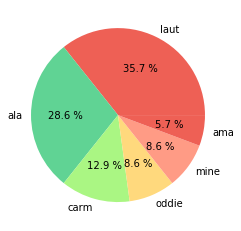

In [27]:
df_acierto=df[df['estado']=='BIEN!']
user=df['usuarie'].unique()
l_user=[]
for elem in user:
    if(elem!='---'):
        l_user.append(elem)
cant_id_acierto=df_acierto['usuarie'].value_counts()
colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
plt.pie(cant_id_acierto,labels=l_user,autopct="%0.1f %%",colors=colores)
plt.show()



    


## Cantidad de tarjetas para las que el usuarie no dió respuesta (timeout).
Creo un DataFrame completo pero con la columna de estado de solo TimeOut, luego con el metodo value.counts() cuento las veces ,por usuario,  que no dio una respuesta.

In [73]:
df_to=df[df['estado']=='TimeOut']
df_user=df_to['usuarie'].value_counts()
print(df_user)

ala     3
mine    3
laut    1
ama     1
Name: usuarie, dtype: int64


## Cantidad de tarjetas en las que el usuarie dió una respuesta errónea.
Creo un DataFrame completo pero con la columna de estado de solo mal!,es decir que no acerto la respuesta. Luego con el metodo value.counts() cuento las veces ,por usuario,  que dio una respuesta erronea.

In [74]:
df_er=df[df['estado']=='MAL!']
df_user=df_er['usuarie'].value_counts()
print(df_user)

laut     21
ala      20
oddie    14
mine     11
carm      4
ama       2
Name: usuarie, dtype: int64
